# <center>Screening and Diagnosis of Autism Spectrum Disorder</center>

#### Autism spectrum disorder (ASD) is a neurological and developmental disorder that affects how people interact with others, communicate, learn, and behave. It's a complex condition involving persistent challenges with social communication.
#### Symptoms generally appear in the first 2 years of life, but autism can be diagnosed at any age. There's no single known cause of ASD.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import dtale
import dtale.app as dtale_app

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

import warnings
warnings.filterwarnings("ignore")

#####  <a href="https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers">click here to download the dataset</a>

In [2]:
df = pd.read_csv('Toddler Autism.csv')
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


#### Data Set Name: Autistic Spectrum Disorder Screening Data for Toddlers
#### Abstract: 
-  Autistic Spectrum Disorder (ASD) is a neurodevelopmental  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.  The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of toddlers that contained influential features to be utilised for further analysis especially in determining autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (Q-Chat-10) plus other individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science

#### Data Type: Predictive and Descriptive: Nominal / categorical, binary and continuous 
#### Task: Classification
#### Attribute Type: Categorical, continuous and binary  
#### Area: Medical, health and social science
#### Format Type: Non-Matrix
#### Does your data set contain missing values? No
#### Number of Instances (records in your data set): 1054
#### Number of Attributes (fields within each record): 18 including the class variable 
#### Attribute Information:  For Further information about the attributes/feature see below table.

#### Attributes:
- A1-A10: Items within Q-Chat-10  in which questions possible answers : “Always, Usually, Sometimes, Rarly & Never” items’ values are mapped to “1” or “0” in the dataset. For questions 1-9 (A1-A9) in Q-chat-10,  if the respose was  Sometimes / Rarly / Never “1” is assigned to the question (A1-A9). However, for question 10 (A10), if the respose was Always / Usually / Sometimes then “1” is assigned to that question. If the user obtained More than 3 Add points together for all ten questions. If your child scores more than 3 (Q-chat-10- score) then there is a potential ASD traits otherwise no ASD traits are observed.

##### Table 1: Details of variables mapping to the Q-Chat-10 screening methods
    Variable in Dataset	Corresponding Q-chat-10-Toddler Features
           A1	Does your child look at you when you call his/her name?
           A2	How easy is it for you to get eye contact with your child? 
           A3	Does your child point to indicate that s/he wants something? (e.g. a toy that is 
                out of reach) 
           A4	Does your child point to share interest with you? (e.g. poin9ng at an 
                interes9ng sight) 
           A5	Does your child pretend? (e.g. care for dolls, talk on a toy phone) 
           A6	Does your child follow where you’re looking? 
           A7	If you or someone else in the family is visibly upset, does your child show signs 
                of wan9ng to comfort them? (e.g. stroking hair, hugging them)
           A8	Would you describe your child’s first words as: 
           A9	Does your child use simple gestures? (e.g. wave goodbye) 
           A10	Does your child stare at nothing with no apparent purpose? 


#### Features collected and their descriptions 
    Feature          	Type	        Description 
    A1: Question 1 Answer 	    Binary (0, 1)	The answer code of the question based on the screening method used  
    A2: Question 2 Answer 	    Binary (0, 1)	The answer code of the question based on the screening method used  
    A3: Question 3 Answer 	    Binary (0, 1)	The answer code of the question based on the screening method used  
    A4: Question 4 Answer 	    Binary (0, 1)	The answer code of the question based on the screening method used  
    A5: Question 5 Answer 	    Binary (0, 1)	The answer code of the question based on the screening method used  
    A6: A6: Question 6 Answer   Binary (0, 1)	The answer code of the question based on the screening method used  
    A7: Question 7 Answer 	    Binary (0, 1)	The answer code of the question based on the screening method used  
    A8: Question 8 Answer 	    Binary (0, 1)	The answer code of the question based on the screening method used  
    A9: Question 9 Answer 	    Binary (0, 1)	The answer code of the question based on the screening method used  
    A:10 Question 10 Answer     Binary (0, 1)	The answer code of the question based on the screening method used  
    Age	                    Number 	        Toddlers (months)
    Score by Q-chat-10 	    Number	        1-10 (Less that or equal 3 no ASD traits; > 3 ASD traits
    Sex	                    Character	        Male or Female 
    Ethnicity	            String	        List of common ethnicities in text format 
    Born with jaundice	    Boolean     	Whether the case was born with jaundice (yes or no)
    Family member               Boolean             Whether any immediate family member has a PDD 
    Who is completing the test  String 	        Parent, self, caregiver, medical staff, clinician ,etc.
    Why_are_you_
    taken_the_screening	    String	        Use input textbox 
    Class variable 	            String 	        ASD traits or No ASD traits                                               


### DATA PREPROCESSING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

#### summary statistics for numeric columns

In [4]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


#### summary statistics for objects columns

In [5]:
df.describe(include="object")

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
count,1054,1054,1054,1054,1054,1054
unique,2,11,2,2,5,2
top,m,White European,no,no,family member,Yes
freq,735,334,766,884,1018,728


In [6]:
df.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class                     0
dtype: int64

#### Encoding part: Labelencoder

In [7]:
df=df.apply(LabelEncoder().fit_transform)

In [8]:
x = df.drop(["Case_No","Class"], axis=1)
y = df[["Class"]]

In [9]:
x

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,0,0,0,0,0,1,1,0,1,16,3,0,8,1,0,4
1,1,1,0,0,0,1,1,0,0,0,24,4,1,5,1,0,4
2,1,0,0,0,0,0,1,1,0,1,24,4,1,8,1,0,4
3,1,1,1,1,1,1,1,1,1,1,12,10,1,0,0,0,4
4,1,1,0,1,1,1,1,1,1,1,8,9,0,5,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,12,1,0,5,0,1,4
1050,0,0,1,1,1,0,1,0,1,0,0,5,1,7,1,0,4
1051,1,0,1,1,1,1,1,1,1,1,6,9,1,8,1,0,4
1052,1,0,0,0,0,0,0,1,0,1,7,3,1,5,0,1,4


#### Feature scaling: Standardscaler

In [10]:
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x = pd.DataFrame(sc_x,columns=x.columns)
sc_x

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test
0,-1.136356,-0.902282,-0.818758,-1.024980,-1.050615,-1.167574,0.733952,1.085212,-0.979340,0.839941,0.016652,-0.761384,-1.517918,1.018735,1.630865,-0.438529,0.179503
1,0.880006,1.108300,-0.818758,-1.024980,-1.050615,0.856477,0.733952,-0.921479,-0.979340,-1.190559,1.019590,-0.417259,0.658797,-0.411656,1.630865,-0.438529,0.179503
2,0.880006,-0.902282,-0.818758,-1.024980,-1.050615,-1.167574,0.733952,1.085212,-0.979340,0.839941,1.019590,-0.417259,0.658797,1.018735,1.630865,-0.438529,0.179503
3,0.880006,1.108300,1.221362,0.975629,0.951823,0.856477,0.733952,1.085212,1.021095,0.839941,-0.484817,1.647488,0.658797,-2.795640,-0.613171,-0.438529,0.179503
4,0.880006,1.108300,-0.818758,0.975629,0.951823,0.856477,0.733952,1.085212,1.021095,0.839941,-0.986286,1.303364,-1.517918,-0.411656,-0.613171,2.280351,0.179503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,-1.136356,-0.902282,-0.818758,-1.024980,-1.050615,-1.167574,-1.362486,-0.921479,-0.979340,0.839941,-0.484817,-1.449633,-1.517918,-0.411656,-0.613171,2.280351,0.179503
1050,-1.136356,-0.902282,1.221362,0.975629,0.951823,-1.167574,0.733952,-0.921479,1.021095,-1.190559,-1.989223,-0.073135,0.658797,0.541938,1.630865,-0.438529,0.179503
1051,0.880006,-0.902282,1.221362,0.975629,0.951823,0.856477,0.733952,1.085212,1.021095,0.839941,-1.237020,1.303364,0.658797,1.018735,1.630865,-0.438529,0.179503
1052,0.880006,-0.902282,-0.818758,-1.024980,-1.050615,-1.167574,-1.362486,1.085212,-0.979340,0.839941,-1.111653,-0.761384,0.658797,-0.411656,-0.613171,2.280351,0.179503


#### Imbalance check

In [11]:
y.value_counts()

Class
1        728
0        326
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

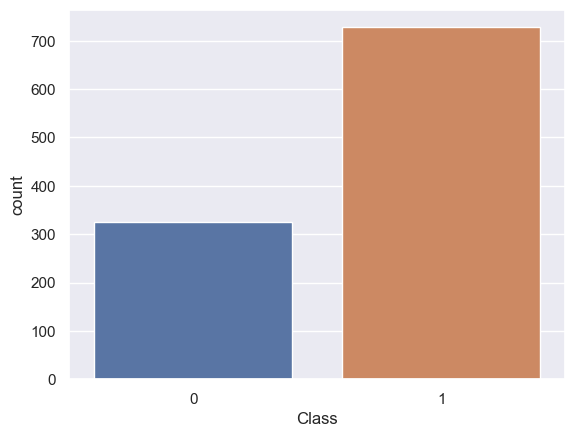

In [12]:
sns.countplot(data=y, x = "Class")

#### Handling imbalance using Randomoversampler

In [13]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(sc_x,y)

In [14]:
y_ros.value_counts()

Class
0        728
1        728
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

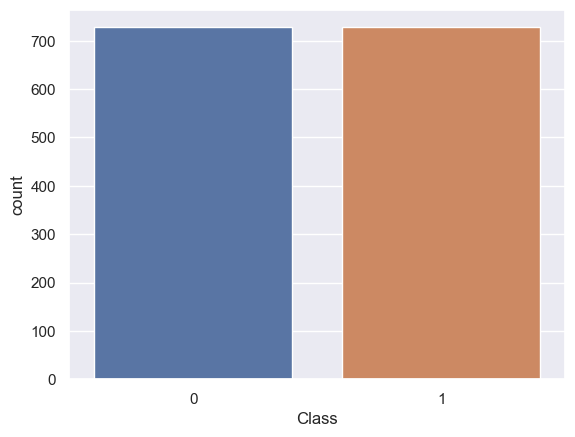

In [15]:
sns.countplot(data=y_ros, x = "Class")

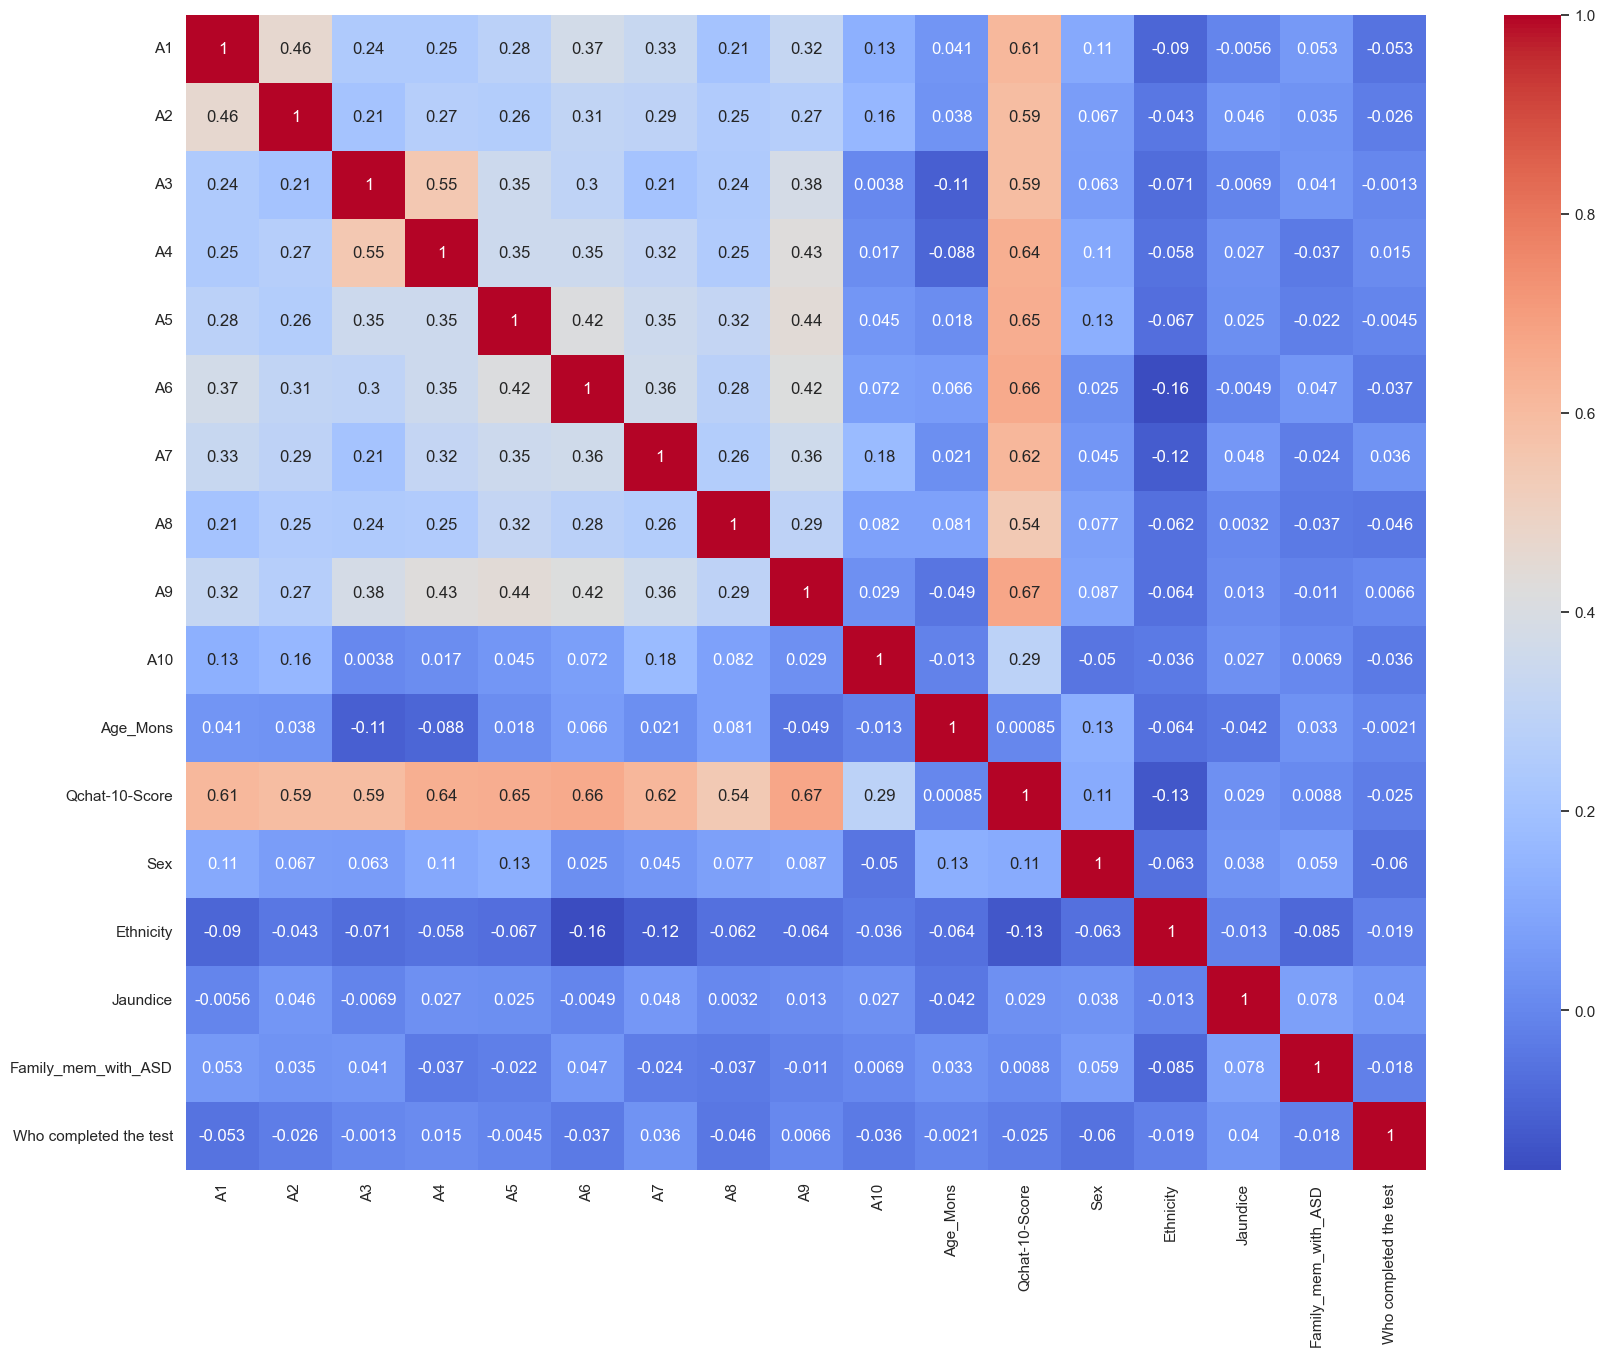

In [16]:
plt.figure(figsize=(20,15))
corr1 = sc_x.corr()
sns.heatmap(corr1,annot=True, cmap= "coolwarm")
plt.show()

### EXPLORATORY DATA ANALYSIS (EDA)

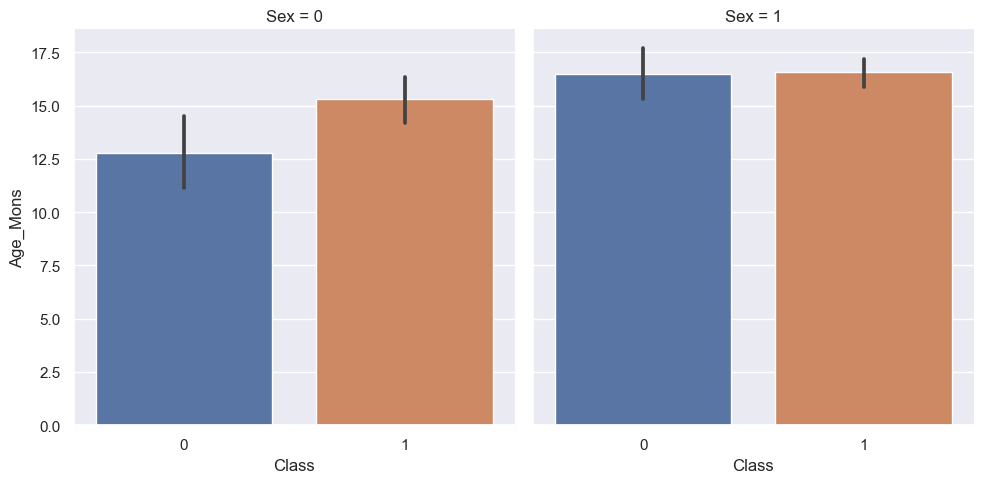

In [17]:
sns.catplot(data=df, x="Class", y = "Age_Mons", kind='bar',col="Sex")

## principal component analysis(pca) -dimensionality reduction

In [19]:
pca = PCA(0.95)
x_pca = pca.fit_transform(sc_x)
print(f"Before PCA shape is: {sc_x.shape}")
print(f"After PCA shape is: {x_pca.shape}")

Before PCA shape is: (1054, 17)
After PCA shape is: (1054, 15)


### split data into training and test

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y, test_size=0.2)

### MODEL BUILDING
#### Applying all the model together

In [21]:
# LogisticRegression
logistic = LogisticRegression()
lr = logistic.fit(x_train, y_train)
y_pred_lr = logistic.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf = rfmodel.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier
bagg = BaggingClassifier()
bg = bagg.fit(x_train, y_train)
y_pred_bg = bagg.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# GradientBoostingClassifier
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train, y_train)
y_pred_gd = gdb.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# XGBClassifier
xgb = XGBClassifier()
xg = xgb.fit(x_train, y_train)
y_pred_xg = xgb.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# SVM
svc = SVC()
sv = svc.fit(x_train, y_train)
y_pred_sv = svc.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)

# KNN
knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [22]:
evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),('gd', gd),('xg', xg),('sv', sv),('kn', kn)])

model_evc = evc.fit(x_train,y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test,pred_evc)

In [23]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Bagging','GradientBoosting','XGBoost','SupportVector','KNearestNeighbors','VotingClassifier']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_bg,accuracy_gd,accuracy_xg,accuracy_sv,accuracy_knn,accuracy_evc]

list3 = [logistic, dtree, rfmodel, bagg, gdb, xgb, svc, knn,evc ]

final_accuracy = pd.DataFrame({'Method Used':list1,
                               'Accuracy':list2})
print(final_accuracy)

          Method Used  Accuracy
0  LogisticRegression  1.000000
1        DecisionTree  0.995261
2        RandomForest  0.985782
3             Bagging  0.981043
4    GradientBoosting  0.995261
5             XGBoost  1.000000
6       SupportVector  0.995261
7   KNearestNeighbors  0.947867
8    VotingClassifier  1.000000


Axes(0.125,0.11;0.775x0.77)


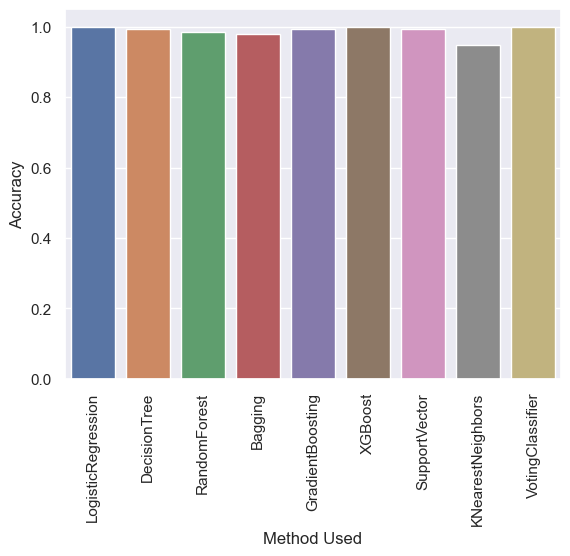

In [24]:
charts = sns.barplot(x = "Method Used", y="Accuracy", data=final_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

### RANDOM FOREST CLASSIFIER IMPLEMENTATION 

In [25]:
rfmodel = RandomForestClassifier()
rfmodel.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
y_pred_train_rf = rfmodel.predict(x_train)
y_pred_test_rf = rfmodel.predict(x_test)

print(f"TRAIN ACCURACY: {accuracy_score(y_train,y_pred_train_rf)}")
print(f"TEST ACCURACY: {accuracy_score(y_test,y_pred_test_rf)}")

TRAIN ACCURACY: 1.0
TEST ACCURACY: 0.985781990521327


#### RandomForest model is Good model but overfitting occurs.To overcome overfitting problem applying Hyperparameter Tuning
#### hyperparameter tuning using randomized search cv

In [27]:
n_estimators= [20,60,100,200,250]
max_depth=[None,2,4,6,8]
max_features=['auto',"sqrt", "log2"]
bootstrap=[True, False]
max_samples=[0.5,0.75,1.0,2.0]
min_samples_split=[2,4,8,10]
min_samples_leaf=[1,2,4]

param_distributions = {'n_estimators':n_estimators,
                       "max_depth":max_depth,
                       "max_features":max_features, 
                       "bootstrap":bootstrap,
                       "max_samples":max_samples, 
                       'min_samples_split':min_samples_split,
                       'min_samples_leaf':min_samples_leaf}


In [28]:
rf_ran = RandomizedSearchCV(estimator= rfmodel, param_distributions=param_distributions,n_jobs=-1, verbose=2 )
rf_ran.fit(x_train, y_train)
rf_ran.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_samples': 1.0,
 'max_features': 'log2',
 'max_depth': 6,
 'bootstrap': True}

#### Best parameters found in Hyper parameter tuning is applied and build new Random forest classifier model
#### Random Forest Classifier model with Hyper parameter tuning applied

In [31]:
rf = RandomForestClassifier(n_estimators=250,min_samples_split = 2,min_samples_leaf = 4,max_samples = 1.0,
                            max_features = 'log2',max_depth = 6, bootstrap = True)
rf.fit(x_train, y_train)
y_pred_train_rf1 = rf.predict(x_train)
y_pred_test_rf1 = rf.predict(x_test)


In [32]:
print(f"TRAIN ACCURACY: {accuracy_score(y_train,y_pred_train_rf1)*100}")
print(f"TEST ACCURACY: {accuracy_score(y_test,y_pred_test_rf1)*100}")

TRAIN ACCURACY: 99.644128113879
TEST ACCURACY: 98.10426540284361
